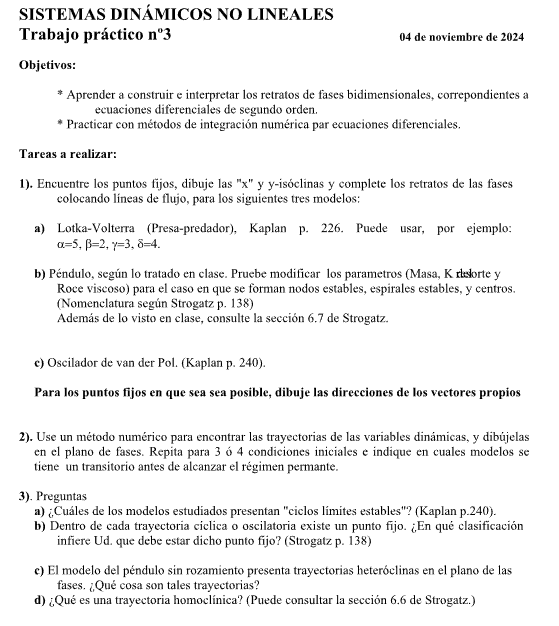

<ipython-input-1-a04e9fad7fad>:60: RuntimeWarning: invalid value encountered in divide
  ax.quiver(X, Y, U / norm, V / norm, color='gray', alpha=0.6)


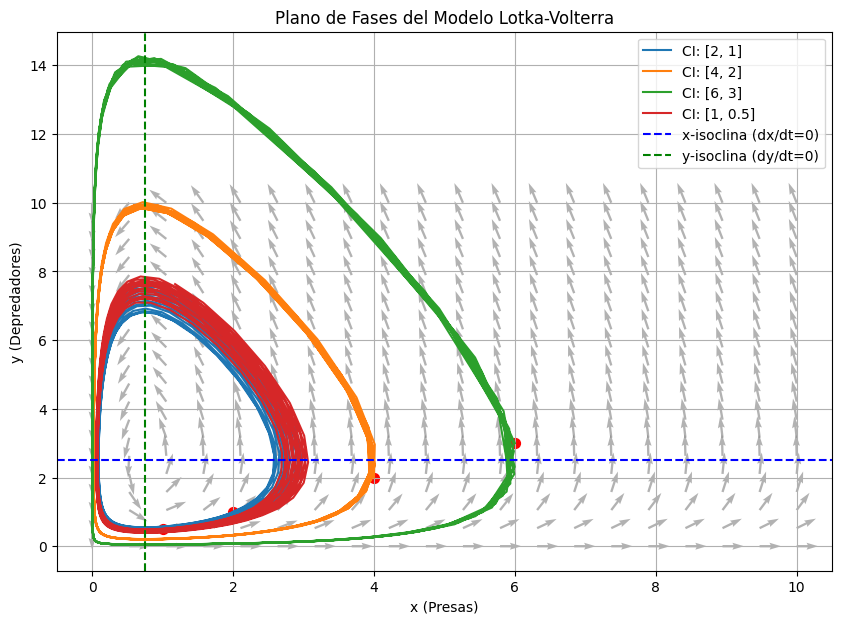

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del modelo Lotka-Volterra
alpha = 5  # Tasa de crecimiento de las presas
beta = 2   # Tasa de depredación
gamma = 3  # Tasa de muerte de los depredadores
delta = 4  # Tasa de reproducción de los depredadores

# Definición del sistema Lotka-Volterra
def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Isoclinas
def x_isocline(y):
    """ x-isoclina (dx/dt = 0): y = alpha / beta """
    return alpha / beta

def y_isocline(x):
    """ y-isoclina (dy/dt = 0): x = gamma / delta """
    return gamma / delta

# Condiciones iniciales para la simulación
initial_conditions_lv = [
    [2, 1],  # Cerca del equilibrio
    [4, 2],  # Alejado del equilibrio
    [6, 3],  # Más alto en la escala
    [1, 0.5] # Más bajo en la escala
]

# Rango de tiempo
t_span = (0, 30)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Crear el plano de fases
fig, ax = plt.subplots(figsize=(10, 7))

# Resolver y graficar las trayectorias
for z0 in initial_conditions_lv:
    sol = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)
    x, y = sol.y
    ax.plot(x, y, label=f'CI: {z0}')  # Trayectoria
    ax.scatter(x[0], y[0], color='red', s=50)  # Punto inicial

# Graficar isoclinas
x_vals = np.linspace(0, 10, 200)
y_vals = np.linspace(0, 10, 200)
ax.axhline(x_isocline(y_vals), color='blue', linestyle='--', label="x-isoclina (dx/dt=0)")
ax.axvline(y_isocline(x_vals), color='green', linestyle='--', label="y-isoclina (dy/dt=0)")

# Agregar un campo vectorial
X, Y = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
U = alpha * X - beta * X * Y
V = delta * X * Y - gamma * Y
norm = np.sqrt(U**2 + V**2)
ax.quiver(X, Y, U / norm, V / norm, color='gray', alpha=0.6)

# Configuración del gráfico
ax.set_title("Plano de Fases del Modelo Lotka-Volterra")
ax.set_xlabel("x (Presas)")
ax.set_ylabel("y (Depredadores)")
ax.legend()
plt.grid()
plt.show()


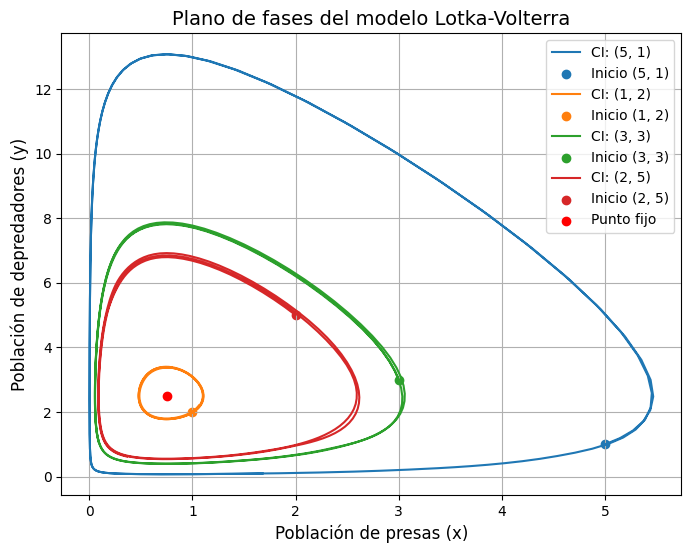

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Modelo Lotka-Volterra (presa-depredador)
def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parámetros y condiciones iniciales
alpha, beta, gamma, delta = 5, 2, 3, 4
initial_conditions = [(5, 1), (1, 2), (3, 3), (2, 5)]  # Condiciones iniciales
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solución numérica y gráficos
fig, ax = plt.subplots(figsize=(8, 6))

for z0 in initial_conditions:
    sol = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval, args=(alpha, beta, gamma, delta))
    ax.plot(sol.y[0], sol.y[1], label=f"CI: {z0}")  # Trayectoria
    ax.scatter(z0[0], z0[1], marker="o", label=f"Inicio {z0}")  # Punto inicial

# Puntos fijos
x_fixed = gamma / delta
y_fixed = alpha / beta
ax.scatter(x_fixed, y_fixed, color="red", label="Punto fijo", zorder=5)

# Personalización del gráfico
ax.set_title("Plano de fases del modelo Lotka-Volterra", fontsize=14)
ax.set_xlabel("Población de presas (x)", fontsize=12)
ax.set_ylabel("Población de depredadores (y)", fontsize=12)
ax.legend()
ax.grid()

plt.show()


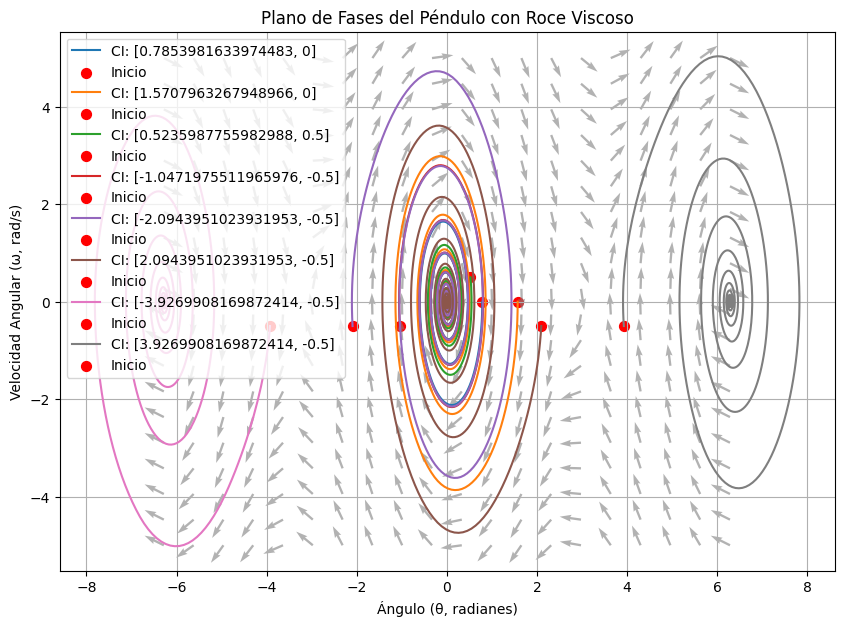

In [ ]:
# Modelo del péndulo con roce viscoso

# Parámetros del péndulo
g, l, m, k = 9.81, 1, 1, 0.5  # Gravedad, longitud, masa, coef. de amortiguamiento

# Definición del sistema de ecuaciones del péndulo (ángulo theta y velocidad angular omega)
def pendulum(t, z):
    theta, omega = z
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta) - (k / m) * omega
    return [dtheta_dt, domega_dt]

# Condiciones iniciales
initial_conditions_pendulum = [
    [np.pi / 4, 0],  # Ángulo inicial 45° sin velocidad inicial
    [np.pi / 2, 0],  # Ángulo inicial 90° sin velocidad inicial
    [np.pi / 6, 0.5],  # Ángulo inicial 30° con velocidad inicial
    [-np.pi / 3, -0.5],  # Ángulo inicial -60° con velocidad inicial
    [-np.pi / 1.5, -0.5],
    [np.pi / 1.5, -0.5],
    [-np.pi / 0.8, -0.5],
    [np.pi / 0.8, -0.5]

]

# Rango de tiempo
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Crear el plano de fases para el péndulo
fig, ax = plt.subplots(figsize=(10, 7))

# Resolver y graficar las trayectorias para cada condición inicial
for z0 in initial_conditions_pendulum:
    sol = solve_ivp(pendulum, t_span, z0, t_eval=t_eval)
    theta, omega = sol.y
    ax.plot(theta, omega, label=f'CI: {z0}')  # Trayectoria
    ax.scatter(theta[0], omega[0], color='red', s=50, label="Inicio")  # Punto inicial

# Agregar un campo vectorial para las direcciones de flujo
theta_vals = np.linspace(-2 * np.pi, 2 * np.pi, 20)
omega_vals = np.linspace(-5, 5, 20)
Theta, Omega = np.meshgrid(theta_vals, omega_vals)
dTheta = Omega
dOmega = -(g / l) * np.sin(Theta) - (k / m) * Omega
norm = np.sqrt(dTheta**2 + dOmega**2)
ax.quiver(Theta, Omega, dTheta / norm, dOmega / norm, color='gray', alpha=0.6)

# Configuración del gráfico
ax.set_title("Plano de Fases del Péndulo con Roce Viscoso")
ax.set_xlabel("Ángulo (θ, radianes)")
ax.set_ylabel("Velocidad Angular (ω, rad/s)")
ax.legend()
plt.grid()
plt.show()


<ipython-input-6-0359f784ec4e>:76: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X_fine, Y_fine, U_fine, levels=[0], colors='green', linewidths=1.5, linestyles='--', label="x-isoclina")
<ipython-input-6-0359f784ec4e>:77: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X_fine, Y_fine, V_fine, levels=[0], colors='red', linewidths=1.5, linestyles='--', label="y-isoclina")


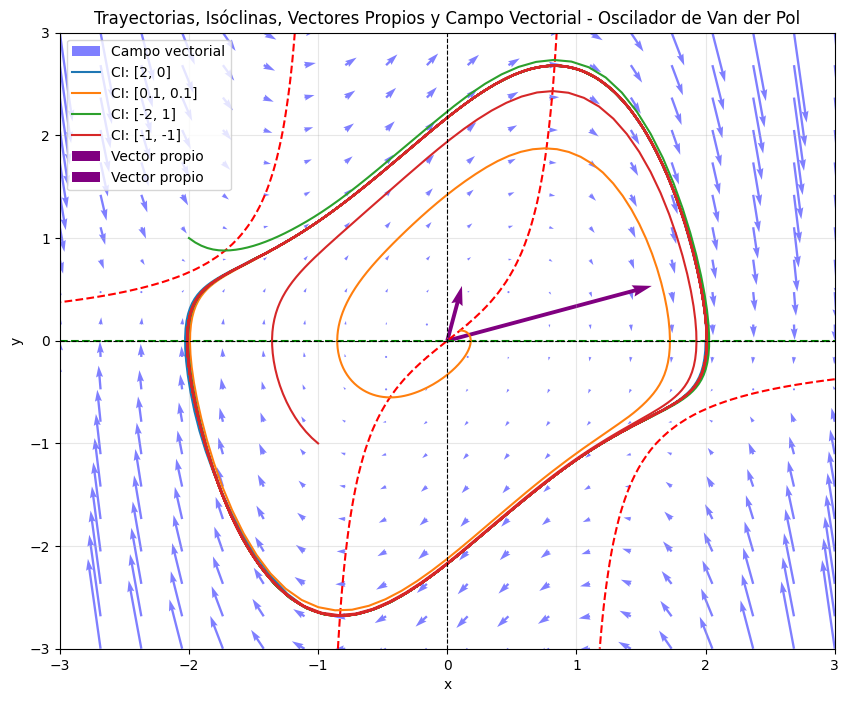

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetro del oscilador de Van der Pol
mu = 1.0

# Definición del sistema de ecuaciones diferenciales
def van_der_pol(t, z):
    x, y = z
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

# Puntos fijos (x = 0, y = 0)
puntos_fijos = [(0, 0)]

# Función para graficar las isóclinas y el campo vectorial
def plot_isoclines_and_vector_field():
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    # Campo vectorial
    U = Y
    V = mu * (1 - X**2) * Y - X

    plt.figure(figsize=(10, 8))
    plt.quiver(X, Y, U, V, color="blue", alpha=0.5, label="Campo vectorial")

    # Isóclinas
    plt.contour(X, Y, U, levels=[0], colors='green', linewidths=1.5, linestyles='--', label="x-isoclina")
    plt.contour(X, Y, V, levels=[0], colors='red', linewidths=1.5, linestyles='--', label="y-isoclina")

    # Puntos fijos
    for pf in puntos_fijos:
        plt.plot(pf[0], pf[1], 'ko', label="Punto fijo")

    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.title("Isóclinas y Campo Vectorial - Oscilador de Van der Pol")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Función para calcular y graficar trayectorias, isóclinas y direcciones de vectores propios
def plot_trajectories_and_eigenvectors():
    t_span = [0, 50]  # Intervalo de tiempo
    condiciones_iniciales = [
        [2, 0],  # Condición inicial 1
        [0.1, 0.1],  # Condición inicial 2
        [-2, 1],  # Condición inicial 3
        [-1, -1]  # Condición inicial 4
    ]

    plt.figure(figsize=(10, 8))

    # Campo vectorial
    x = np.linspace(-3, 3, 20)
    y = np.linspace(-3, 3, 20)
    X, Y = np.meshgrid(x, y)
    U = Y
    V = mu * (1 - X**2) * Y - X
    plt.quiver(X, Y, U, V, color="blue", alpha=0.5, label="Campo vectorial")

    # Isóclinas
    x_fine = np.linspace(-3, 3, 100)
    y_fine = np.linspace(-3, 3, 100)
    X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
    U_fine = Y_fine
    V_fine = mu * (1 - X_fine**2) * Y_fine - X_fine
    plt.contour(X_fine, Y_fine, U_fine, levels=[0], colors='green', linewidths=1.5, linestyles='--', label="x-isoclina")
    plt.contour(X_fine, Y_fine, V_fine, levels=[0], colors='red', linewidths=1.5, linestyles='--', label="y-isoclina")

    # Trayectorias en el plano de fases
    for ci in condiciones_iniciales:
        solucion = solve_ivp(van_der_pol, t_span, ci, t_eval=np.linspace(t_span[0], t_span[1], 1000))
        plt.plot(solucion.y[0], solucion.y[1], label=f"CI: {ci}")

    # Direcciones de vectores propios en el punto fijo (0, 0)
    A = np.array([[0, 1], [-1, mu]])
    eigenvalues, eigenvectors = np.linalg.eig(A)
    for vec in eigenvectors.T:
        plt.quiver(0, 0, vec[0], vec[1], color='purple', scale=5, width=0.005, label="Vector propio")

    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.title("Trayectorias, Isóclinas, Vectores Propios y Campo Vectorial - Oscilador de Van der Pol")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# Graficar trayectorias, isóclinas y vectores propios
plot_trajectories_and_eigenvectors()


###  preguntas:



**3a) ¿Cuáles de los modelos estudiados presentan "ciclos límites estables"?**
Si hay una pequeña perturbación externa, entonces, después de un tiempo suficiente (es decir, cuando \( t ⟼ ∞ \)), se restablece la trayectoria original. Este tipo de comportamiento se denomina ciclo límite estable.  
El **oscilador de van der Pol** presenta ciclos límites estables. Estos ciclos aparecen debido a la no linealidad del sistema, que genera oscilaciones auto-sostenidas que se estabilizan en una órbita cerrada, independientemente de las condiciones iniciales.

---



**3b) Dentro de cada trayectoria cíclica u oscilatoria, existe un punto fijo. ¿En qué clasificación infiere Ud. que debe estar dicho punto fijo?**  
El punto fijo que existe dentro de una trayectoria cíclica u oscilatoria se clasifica generalmente como un **punto fijo inestable** del tipo **silla** o un **foco inestable**. Esto se debe a que el flujo en sus alrededores expulsa las trayectorias hacia el ciclo límite estable.

---




**3c) El modelo del péndulo sin rozamiento presenta trayectorias heteróclinas en el plano de las fases. ¿Qué cosa son tales trayectorias?**  

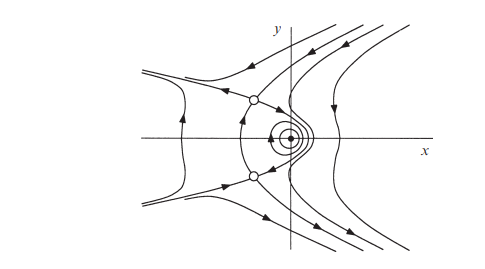

Observa que los dos puntos de silla están unidos por un par de trayectorias. Estas se llaman trayectorias heteroclínicas o conexiones de silla. Al igual que las órbitas homoclínicas, las trayectorias heteroclínicas son mucho más comunes en sistemas reversibles o conservativos que en otros tipos de sistemas.

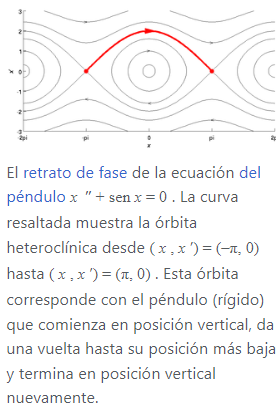

En matemáticas , en el esquema de fases de un sistema dinámico , una órbita heteroclínica (a veces llamada conexión heteroclínica ) es un camino en el espacio de fases que une dos puntos de equilibrio diferentes . Si los puntos de equilibrio al principio y al final de la órbita son los mismos, la órbita es una órbita homoclínica .
---


**3d) ¿Qué es una trayectoria homoclínica?**  
En el estudio de los sistemas dinámicos , una órbita homoclínica es un camino a través del espacio de fases que une un punto de equilibrio de silla consigo mismo. Más precisamente, una órbita homoclínica se encuentra en la intersección de la variedad estable y la variedad inestable de un equilibrio. Es una órbita heteroclínica –un camino entre dos puntos de equilibrio cualesquiera– en el que los puntos finales son uno y el mismo.

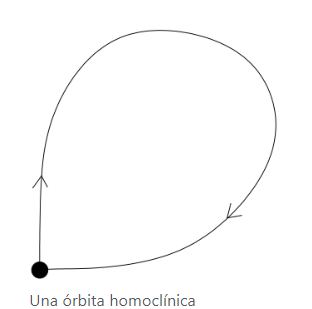